In [1]:
pip install uproot awkward

  Using cached uproot-4.1.9-py2.py3-none-any.whl (301 kB)
  Using cached awkward-1.7.0-cp39-cp39-manylinux2010_x86_64.whl (14.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas 
import uproot
import awkward
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.grid'] = True
from numpy import ma

In [3]:
file = uproot.open('trkana_signal.root')
file.keys()
tree = file['TrkAna;1']['trkana;1']
branch = np.array(tree['dem.'])
t = branch['status']
t2= branch['mom'] #values of momentum


In [4]:
zipped_t = zip(t,t2)
sorted_t= sorted(zipped_t) #sorts status and dem together in 2d list. Column 1 = status, Column 2 = dem


x = np.array(sorted_t) #turns sorted values into an array
print(x)

vals = x[x[:,0] > 0] #select rows where only positive values of status is returned

momentum_vals = vals[:,1] #values to be plotted
print(np.mean(momentum_vals))

[[-1000.         -1000.        ]
 [-1000.         -1000.        ]
 [-1000.         -1000.        ]
 ...
 [    2.           104.59921265]
 [    2.           104.63299561]
 [    2.           104.73020172]]
103.41762313613663


103.21025229889213


(array([  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   1.,   2.,   3.,   5.,  26., 265.,   3.]),
 array([ 53.12668991,  55.87404613,  58.62140236,  61.36875858,
         64.11611481,  66.86347103,  69.61082726,  72.35818348,
         75.1055397 ,  77.85289593,  80.60025215,  83.34760838,
         86.0949646 ,  88.84232082,  91.58967705,  94.33703327,
         97.0843895 ,  99.83174572, 102.57910194, 105.32645817,
        108.07381439]),
 <BarContainer object of 20 artists>)

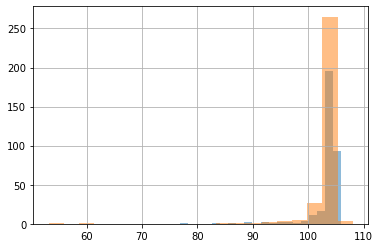

In [5]:
file_bkg= uproot.open("trkana_signalAndBkg.root")
tree_bkg = file_bkg['TrkAna']['trkana;1']
branches2 = tree_bkg.arrays()['dem.']
tbkg= branches2['status']
tbkg2 = branches2['mom']

zipped_bkg = zip(tbkg,tbkg2)
sorted_bkg= sorted(zipped_bkg)
x_bkg = np.array(sorted_bkg)
vals_bkg = x_bkg[x_bkg[:,0] > 0]
momentum_vals_bkg = vals_bkg[:,1]

print(np.mean(momentum_vals_bkg))

plt.hist(momentum_vals, bins= 20, label = "without background", alpha =.5)
plt.hist(momentum_vals_bkg, bins= 20, label = "with background", alpha = .5)



 mean e- fit momentum(without background): 103.41762313613663
Standard deviation e- momentum fit (without background): 2.9102938420352182
 
 mean e- fit momentum (with background): 103.21025229889213
Standard deviation e- fit momentum (with background): 4.429148071359829
 
 mean mu- fit momentum (with background): 103.84624478896218
Standard deviation mu- fit momentum (with background): 2.9370215469212835
 
 mean mu- fit momentum(without background): 103.8179066767458
Standard deviation mu- momentum fit (without background): 3.6751043652672575


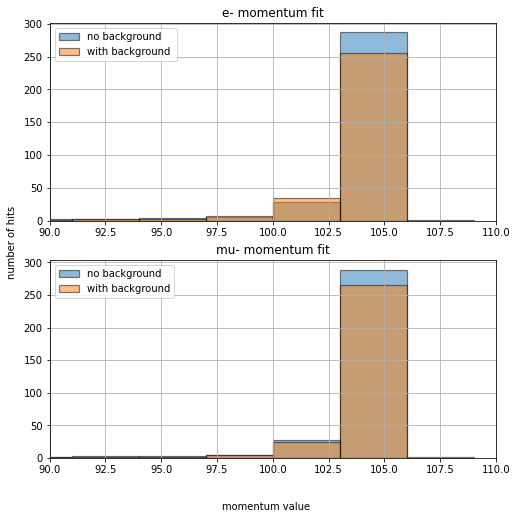

In [6]:
#UEM

branch_mu = np.array(tree['dmm.'])
t_mu=branch_mu['status']
t_mu2=branch_mu['mom']

zipped_mu = zip(t_mu,t_mu2)
sorted_mu= sorted(zipped_mu)
x_mu = np.array(sorted_mu)
vals_mu = x_mu[x_mu[:,0] > 0]

momentum_vals_mu = vals_mu[:,1]

#UEM BKG
branch_mu2 = np.array(tree_bkg['dmm.'])
t_mu_bkg=branch_mu2['status']
t_mu2_bkg=branch_mu2['mom']
zipped_mu_bkg = zip(t_mu_bkg,t_mu2_bkg)
sorted_mu_bkg= sorted(zipped_mu_bkg)
x_mu_bkg = np.array(sorted_mu_bkg)
vals_mu_bkg = x_mu_bkg[x_mu_bkg[:,0] > 0]
momentum_vals_mu_bkg = vals_mu_bkg[:,1]
f, axs = plt.subplots(2,figsize=(8,8))

#my array larger than 0 boolean values apply as mask to another array momentum[status]
#misalignemnt and miscalbrations samples
#toy montecarlo
#bin_width = max-min / sqrt(size)
w= 3


axs[0].hist(momentum_vals, bins=np.arange(52, 109 + w, w), label = "no background ", alpha =.5, linewidth=1.2, edgecolor='black')
axs[0].hist(momentum_vals_bkg, bins = np.arange(52, 109 + w, w), label = "with background ", alpha = .5, linewidth=1.2, edgecolor='black')
axs[0].set_title("e- momentum fit")
axs[0].set_xlim(xmin=90, xmax=110)

axs[1].hist(momentum_vals_mu, bins = np.arange(52, 109 + w, w), label = 'no background', alpha = .5, linewidth=1.2, edgecolor='black')
axs[1].hist(momentum_vals_mu_bkg, bins = np.arange(52, 109 + w, w), label = 'with background', alpha = .5, linewidth=1.2, edgecolor='black')
axs[1].set_title("mu- momentum fit")
axs[1].set_xlim(xmin=90, xmax=110)

axs[0].legend()
axs[1].legend()


f.text(0.5, 0.04, 'momentum value', ha='center', va='center')
f.text(0.06, 0.5, 'number of hits', ha='center', va='center', rotation='vertical')




print("\n mean e- fit momentum(without background):", np.mean(momentum_vals))
print("Standard deviation e- momentum fit (without background):", np.std(momentum_vals) )

print(" \n mean e- fit momentum (with background):", np.mean(momentum_vals_bkg))
print("Standard deviation e- fit momentum (with background):", np.std(momentum_vals_bkg))

print(" \n mean mu- fit momentum (with background):", np.mean(momentum_vals_mu))
print("Standard deviation mu- fit momentum (with background):", np.std(momentum_vals_mu))

print(" \n mean mu- fit momentum(without background):", np.mean(momentum_vals_mu_bkg))
print("Standard deviation mu- momentum fit (without background):", np.std(momentum_vals_mu_bkg) )

#zoom in values (range)

In [7]:
#bins


#momentum e- max 108.08 momentum e- min = 53.12
#momentum mu max 108.71~109 min 
# of bins

bin1 = np.sqrt(333)
bin2 = np.sqrt(331)
bin3= np.sqrt(305)
bin4 = np.sqrt(309)

#binwidth (max-min)/sqrt(data size)
bin_width = 3 #approx 3

entrance momentum: 103.1776
mid momentum: 102.10106
exit momentum: 101.07215


Text(0.5, 1.0, 'MC truth momentum info for downstream e-')

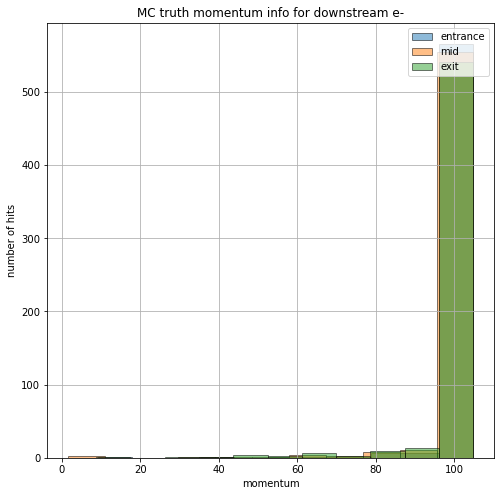

In [8]:
#MC truth
# demmc MC info for downstream e minus
file = uproot.open('trkana_signal.root')

tree = file['TrkAna;1']['trkana;1']
branch_MC_exit = np.array(tree['demmcxit']) #MC downstream e- track exit
t_MC = branch_MC_exit['mom']
exit_info = t_MC[t_MC>1]

branch_MC_mid = np.array(tree['demmcmid'])
t_MC_mid = branch_MC_mid['mom']
mid_info = t_MC_mid[t_MC_mid>1]

branch_mc_entrance = np.array(tree["demmcent"])
t_MC_ent = branch_mc_entrance['mom']
ent_info = t_MC_ent[t_MC_ent>1]

f, axs = plt.subplots(1,figsize=(8,8))
bin_count_ent = int(np.ceil(np.log2(len(ent_info))) + 1)
bin_count_mid = int(np.ceil(np.log2(len(mid_info))) + 1)
bin_count_exit = int(np.ceil(np.log2(len(exit_info))) + 1)
axs.hist(ent_info, bins = bin_count_ent, alpha = .5, linewidth=1, edgecolor='black', label = 'entrance')
axs.hist(mid_info, bins = bin_count_mid, alpha = .5, linewidth=1, edgecolor='black', label = 'mid')
axs.hist(exit_info, bins = bin_count_ent, alpha = .5, linewidth=1, edgecolor='black', label = 'exit')

print('entrance momentum:', np.mean(ent_info))
print('mid momentum:',np.mean(mid_info))
print('exit momentum:', np.mean(exit_info))

#plt.hist([ent_info, mid_info,  exit_info], bins=bin_count_ent, label=['entrance', 'mid', 'exit'])
plt.legend(loc='upper right')
plt.xlabel('momentum')
plt.ylabel('number of hits')
plt.xlim()
plt.title('MC truth momentum info for downstream e-')

#zoom in data range
#momentum spectrum according to PDG code (particle identification)
#fix this histogram
#divide into subcat.
#demcpdg (refer to pdg document)
#same for upstream electrons

array([104.4848  , 104.70618 , 104.026505, 104.91869 , 105.18366 ,
       103.8624  , 104.54195 , 104.89109 , 105.00171 , 102.466156,
       104.417175, 101.302956, 104.619705, 104.7723  , 104.71203 ,
       105.967026, 104.88091 , 105.058266, 104.83166 , 105.14927 ,
       105.02588 , 104.98408 , 104.14649 , 104.76067 , 101.94982 ,
       103.73383 , 104.712875, 104.2317  , 101.67201 , 103.736465,
       102.88911 , 105.114555, 105.10522 , 104.703766, 104.23104 ,
       105.202126, 104.24181 , 104.478165, 104.65497 , 104.368095,
       104.911766, 104.59924 , 104.21588 , 105.2399  , 104.582855,
       105.371994, 103.96972 , 104.899796, 104.67479 , 104.06175 ,
       105.17004 , 104.71849 , 103.921455, 105.15712 , 102.909134,
       104.44707 , 102.46507 , 104.02863 , 105.09133 ,  93.370674,
       104.99484 , 104.543564,  95.86153 , 104.2254  , 105.177505,
       104.73233 , 103.95689 , 101.923485, 103.29821 , 103.92714 ,
       104.52039 , 104.05292 , 104.9697  , 104.28892 , 104.132

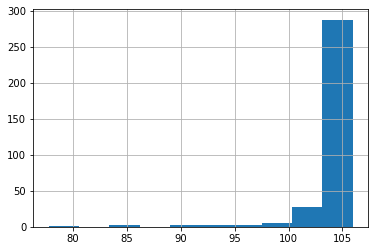

In [9]:
#pdg masking practice

file_bkg= uproot.open("trkana_signalAndBkg.root")
tree_bkg = file_bkg['TrkAna']['trkana;1']
dmm = np.array(tree['dmm.']) #MC downstream e- track exit
dmm_mom=dmm['mom']
pdg = dmm['pdg']

dmmcases_ma = ma.masked_values(pdg, 13)
mom_vals= dmm_mom[dmmcases_ma.mask]
plt.hist(mom_vals)
mom_vals
#11 = electron, -11 = positron, 13 = muon, -13 = positive muon, 2212 = proton

#now make a mask that will filter so only values returning 13 will be on the graph


In [10]:
#masking practice
branch_mu = np.array(tree['dmm.'])
status=branch_mu['status']
momentum=branch_mu['mom']

status_mask =ma.masked_where(status >= 0, status)

mom_values = momentum[status_mask.mask]
mom_values

branch_mu2 = np.array(tree_bkg['dmm.'])
mu_status_bkg=branch_mu2['status']
mu_mom_bkg=branch_mu2['mom']

status_mask_bkg =ma.masked_where(mu_status_bkg >= 0, mu_status_bkg)

mom_values_bkg = mu_mom_bkg[status_mask_bkg.mask]

mom_values_bkg


array([104.32496 , 105.66903 , 105.20529 , 102.64875 , 104.927795,
       104.48211 , 104.90195 , 104.76318 , 104.82662 , 104.12649 ,
       105.211174, 103.87958 , 104.90412 , 104.87888 , 104.94997 ,
       104.937325, 104.98712 , 104.11518 , 103.19774 , 104.38329 ,
       104.00518 , 104.14224 , 103.620514, 102.051025, 104.016716,
       104.73782 , 101.998245, 103.415245, 102.85093 , 104.872505,
       100.48754 , 105.46637 , 105.13536 , 104.93687 , 104.68505 ,
       104.28542 , 104.67116 , 104.98492 , 104.99091 , 104.98454 ,
       104.33109 , 104.29338 , 105.31446 , 104.96041 , 103.065544,
       105.06171 , 104.448845, 103.81496 , 104.83614 , 104.16986 ,
       105.15718 , 102.45696 , 104.28793 , 104.9954  , 105.59942 ,
       103.75709 , 103.20705 , 104.53112 , 103.940056, 105.16596 ,
       104.38476 , 104.80359 , 104.68871 , 104.24111 , 104.41772 ,
       104.99129 , 105.15906 , 105.21862 , 104.65802 , 104.90613 ,
       103.95933 , 104.543144, 108.710884, 104.599434, 102.583

Text(0.06, 0.5, 'number of hits')

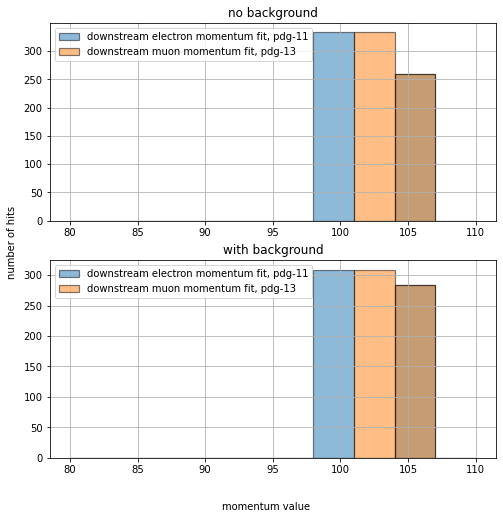

In [42]:
#graph for momentum based on particle family value

#upstream|electron family
uem = np.array(tree_bkg['uem.'])
status_uem = uem['status']

status_uem[status_uem>0]
#upstream electron values all -1000, with avg momentum being -1000 as well.

#downstream|electron family
dem = np.array(tree['dem.'])
status_dem=dem['status']
dem_pdg=dem['pdg']
dem_mom= dem['mom']

#first apply status filter
dem_status = ma.masked_where(status_dem >= 0, status_dem)
dem_vals = dem_mom[dem_status.mask]
#now pdg filter
dem_pdg_mask = ma.masked_where(dem_pdg == 11, dem_pdg)
#vals to be plotted
dem_vals_p = dem_vals[dem_pdg_mask]



#downstream|muon family
dmm = np.array(tree['dmm.'])
status_dmm = dmm['status']
dmm_pdg=dmm['pdg']
dmm_mom= dmm['mom']
#status mask
dmm_status = ma.masked_where(status_dmm >= 0, status_dmm)
dmm_vals = dmm_mom[dmm_status.mask]
#pdg mask
dmm_pdg_mask = ma.masked_where(dmm_pdg == 13, dem_pdg)
#vals to be plotted
dmm_vals_p = dmm_vals[dmm_pdg_mask]


dem_bkg = np.array(tree_bkg['dem.'])
status_dem_bkg=dem_bkg['status']
dem_pdg_bkg=dem_bkg['pdg']
dem_mom_bkg= dem_bkg['mom']


dem_status_bkg = ma.masked_where(status_dem_bkg >= 0, status_dem_bkg)
dem_vals_bkg = dem_mom_bkg[dem_status_bkg.mask]
dem_pdg_mask_bkg = ma.masked_where(dem_pdg_bkg == 11, dem_pdg_bkg)
dem_vals_bkg = dem_vals[dem_pdg_mask_bkg]

#make comparison with exhisting output
#comparisons with angle 
#comparison between mu2e and mu2e2
#misalignment and miscal
#renconstructed and MC

#install tracktoy github
dmm_bkg = np.array(tree_bkg['dmm.'])
status_dmm_bkg = dmm_bkg['status']
dmm_pdg_bkg=dmm_bkg['pdg']
dmm_mom_bkg= dmm_bkg['mom']

dmm_status_bkg = ma.masked_where(status_dmm_bkg >= 0, status_dmm_bkg)
dmm_vals_bkg = dmm_mom[dmm_status.mask]

dmm_pdg_mask_bkg = ma.masked_where(dmm_pdg_bkg == 13, dem_pdg_bkg)

dmm_vals_bkg = dmm_vals[dmm_pdg_mask_bkg]


w = 3
f, axs = plt.subplots(2,figsize=(8,8))
axs[0].hist(dem_vals_p, bins=np.arange(80, 110 + w, w), label = "downstream electron momentum fit, pdg-11", alpha =.5, linewidth=1.2, edgecolor='black')
axs[0].hist(dmm_vals_p, bins = np.arange(80, 110+w, w), label = 'downstream muon momentum fit, pdg-13', alpha = .5, linewidth=1.2, edgecolor='black')
axs[0].legend()
axs[1].hist(dem_vals_bkg, bins=np.arange(80, 110 + w, w), label = "downstream electron momentum fit, pdg-11", alpha =.5, linewidth=1.2, edgecolor='black')
axs[1].hist(dmm_vals_bkg, bins = np.arange(80, 110 + w, w), label = 'downstream muon momentum fit, pdg-13', alpha = .5, linewidth=1.2, edgecolor='black')
axs[0].set_title("no background")
axs[1].set_title("with background")
axs[1].legend()




#fix mask and bin sizing #change width (w)


f.text(0.5, 0.04, 'momentum value', ha='center', va='center')
f.text(0.06, 0.5, 'number of hits', ha='center', va='center', rotation='vertical')

#binwidth (max-min)/sqrt(data size)





In [12]:

print(np.min(dem_vals_p))
print(np.min(dmm_vals_bkg))



100.99635
101.302956


NameError: name 'status_exit' is not defined

Text(0.5, 1.0, 'MC truth momentum info for downstream e-')

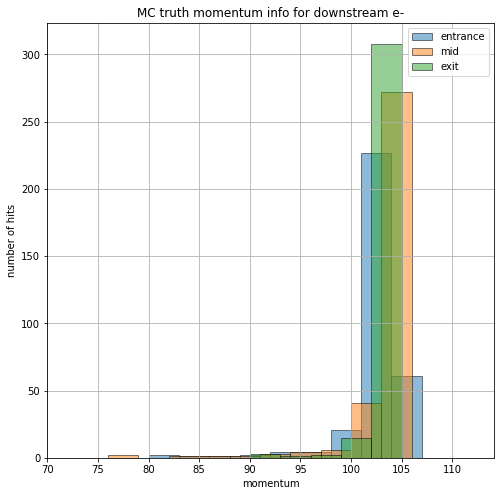

In [20]:
status_dmm = dmm['status']

demmc_exit = np.array(tree['demmcxit']) #MC downstream e- track exit

exit_mom = demmc_exit['mom']
demmc_exit_status = ma.masked_where(status_dmm >= 0, status_dmm)
demmc_exit_vals = exit_mom[demmc_exit_status.mask]

demmc_mid = np.array(tree['demmcmid'])

mid_mom = demmc_mid['mom']
demmc_mid_status = ma.masked_where(status_dmm >= 0, status_dmm)
demmc_mid_vals = mid_mom[demmc_mid_status.mask]

demmc_entrance = np.array(tree['demmcent'])
entrance_mom = demmc_entrance['mom']
demmc_entrance_status = ma.masked_where(status_dmm >= 0, status_dmm)
demmc_entrance_vals = entrance_mom[demmc_entrance_status.mask]


f, axs = plt.subplots(1,figsize=(8,8))



axs.hist(demmc_exit_vals, bins=bin_count_exit , alpha = .5, linewidth=1, edgecolor='black', label = 'entrance')
axs.hist(demmc_mid_vals, bins=bin_count_mid, alpha = .5, linewidth=1, edgecolor='black', label = 'mid')
axs.hist(demmc_entrance_vals, bins=bin_count_ent, alpha = .5, linewidth=1, edgecolor='black', label = 'exit')

bin_count_ent = np.arange(90, 110 + w, w)
bin_count_mid = np.arange(70, 110 + w, w)
bin_count_exit = np.arange(70, 110 + w, w)

plt.legend(loc='upper right')
plt.xlabel('momentum')
plt.ylabel('number of hits')
plt.xlim(70)
plt.title('MC truth momentum info for downstream e-')



In [15]:
print('entrance momentum:', np.mean(demmc_entrance_vals))
print('mid momentum:',np.mean(demmc_mid_vals))
print('exit momentum: ', np.mean(demmc_exit_vals))

print('entrance min:', np.min(demmc_entrance_vals))
print('mid min:',np.min(demmc_mid_vals))
print('exit min:', np.min(demmc_exit_vals))

print('entrance max:', np.max(demmc_entrance_vals))
print('mid max:',np.max(demmc_mid_vals))
print('exit max:', np.max(demmc_exit_vals))



entrance momentum: 103.75915
mid momentum: 103.08624
exit momentum:  101.52115
entrance min: 83.19321
mid min: 76.40913
exit min: 27.526339
entrance max: 104.85397
mid max: 104.68753
exit max: 104.59943
